In [10]:
# Loading the dataset
import pandas as pd

df = pd.read_csv("air_quality_updated_dates.csv")

# Converting 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extracting Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

#Null Checking & Cleaning
null_summary = df.isnull().sum()
null_percent = (null_summary / len(df)) * 100

# Printing null summary and percentages
print("Null Value Summary:")
print(null_summary)
print("\nNull Value Percentage:")
print(null_percent)

# Droping columns with > 40% nulls
columns_to_drop = null_percent[null_percent > 40].index.tolist()
if columns_to_drop:
    df.drop(columns=columns_to_drop, inplace=True)
    print(f"\nDropped columns with > 40% nulls: {columns_to_drop}")

# Droping rows (>2)
original_rows = len(df)
df = df.dropna(thresh=len(df.columns) - 2)
rows_dropped = original_rows - len(df)
print(f"\nDropped {rows_dropped} rows with more than 2 missing values.")


# Displaying the first few rows of the cleaned dataframe
print("\nthe 5 cleaned DataFrame:")
display(df.head())

Null Value Summary:
City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
Year           0
Month          0
dtype: int64

Null Value Percentage:
City           0.0
Country        0.0
Date           0.0
PM2.5          0.0
PM10           0.0
NO2            0.0
SO2            0.0
CO             0.0
O3             0.0
Temperature    0.0
Humidity       0.0
Wind Speed     0.0
Year           0.0
Month          0.0
dtype: float64

Dropped 0 rows with more than 2 missing values.

the 5 cleaned DataFrame:


,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Year,Month
0,Bangkok,Thailand,2021-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,2021,3
1,Istanbul,Turkey,2021-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,2021,2
2,Rio de Janeiro,Brazil,2021-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,2021,11
3,Mumbai,India,2021-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,2021,3
4,Paris,France,2021-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,2021,4


## Subplots for commercial and private analysis

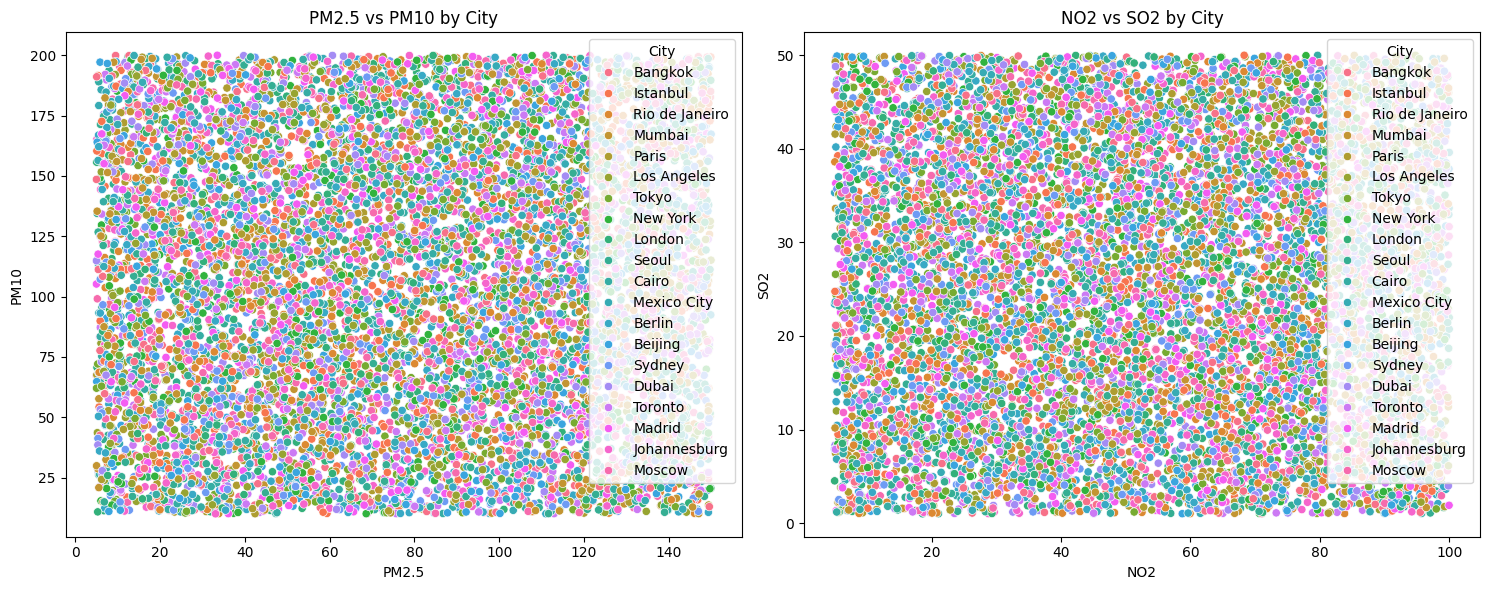

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for PM2.5 vs PM10
sns.scatterplot(data=df, x='PM2.5', y='PM10', hue='City', ax=axes[0])
axes[0].set_title('PM2.5 vs PM10 by City')

# Scatter plot for NO2 vs SO2
sns.scatterplot(data=df, x='NO2', y='SO2', hue='City', ax=axes[1])
axes[1].set_title('NO2 vs SO2 by City')

# Adjusting layout to prevent overlapping
plt.tight_layout()

# Displaying the plots
plt.show()

## Year-over-year  and month-over-month  analysis

In [7]:
yoy_analysis = df.groupby('Year').mean(numeric_only=True)
mom_analysis = df.groupby(['Year', 'Month']).mean(numeric_only=True)

print("Year-over-Year Analysis:")
display(yoy_analysis.head())

print("\nMonth-over-Month Analysis:")
display(mom_analysis.head())

Year-over-Year Analysis:


,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Month
Year,,,,,,,,,,
2021,76.617126,104.834479,52.150276,25.761815,5.041047,106.631611,14.485311,55.017369,10.253381,6.461746
2022,78.266865,104.418461,52.276073,25.258560,5.079580,106.079034,15.433552,55.077420,10.223447,6.594959
2023,77.461323,104.061656,52.169607,25.013194,5.023332,105.384478,14.772624,55.140930,10.218083,6.359028



Month-over-Month Analysis:


PM2.5        PM10        NO2        SO2        CO          O3  \
Year Month                                                                      
2021 1      75.837352  105.833275  51.754181  25.158920  5.015505  103.541289   
     2      79.622248  107.203527  53.866822  25.982907  4.875853  106.584070   
     3      81.120340  107.241623  51.315358  25.673208  5.036113  102.837849   
     4      75.725000  106.558953  55.086959  26.008378  5.158378  108.004696   
     5      72.685745  100.088723  53.663050  24.978440  4.845674  110.684894   

            Temperature   Humidity  Wind Speed  
Year Month                                      
2021 1        13.510418  55.781394   10.405854  
     2        14.396744  56.286473    9.622907  
     3        14.536340  57.100113   10.311698  
     4        13.642534  50.317196   10.657027  
     5        15.911844  54.666950   10.004858

## Customer engagement histogram

Gradient Histograms for Engagement Metrics:


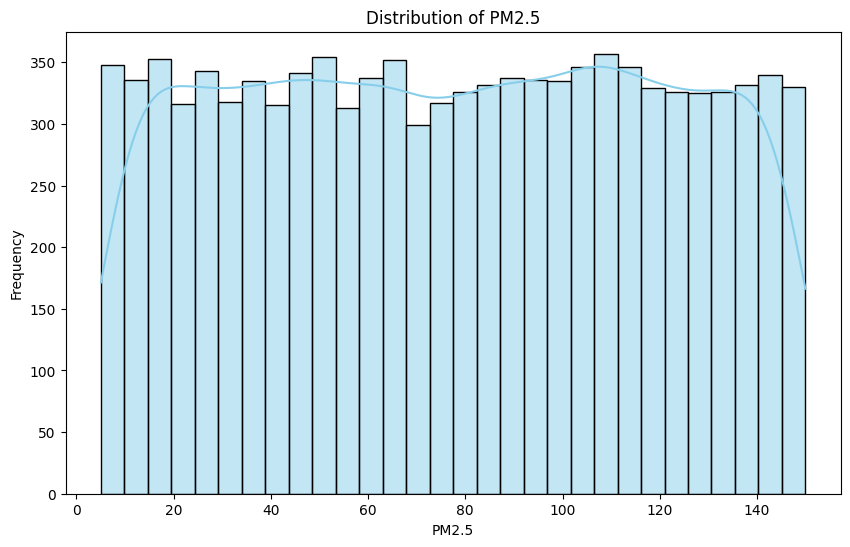

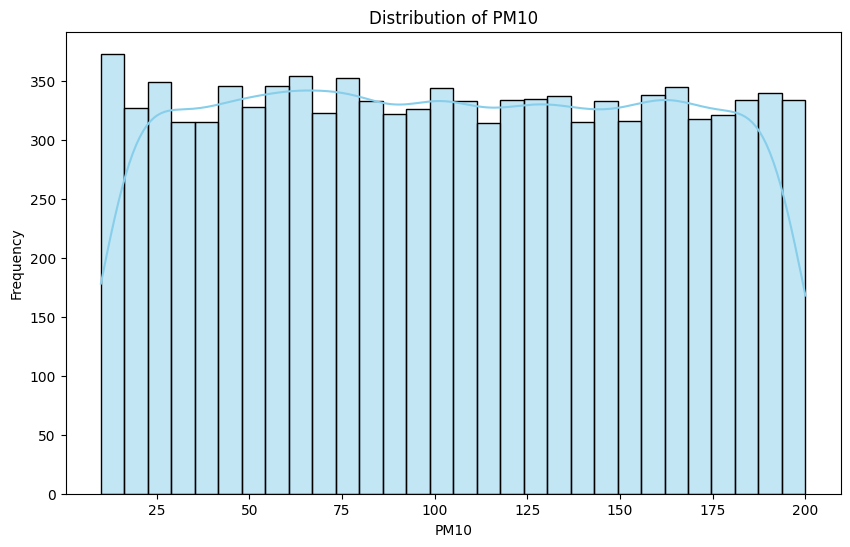

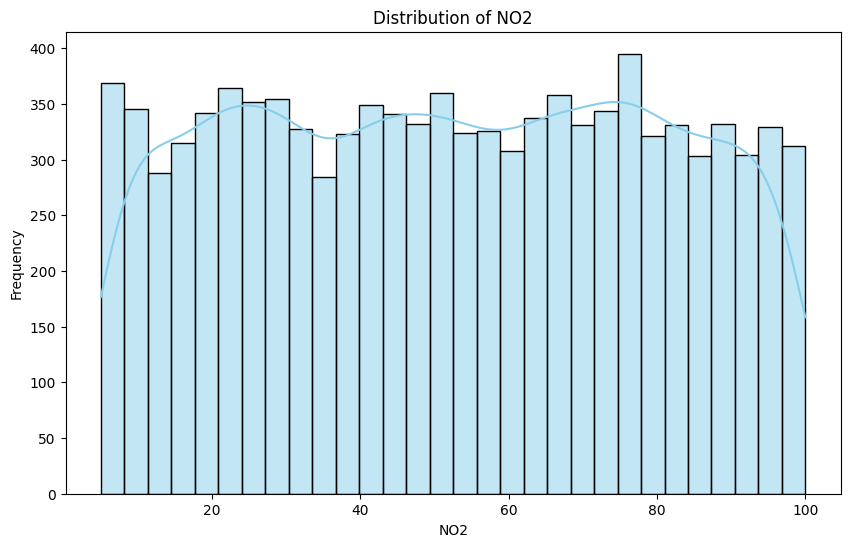

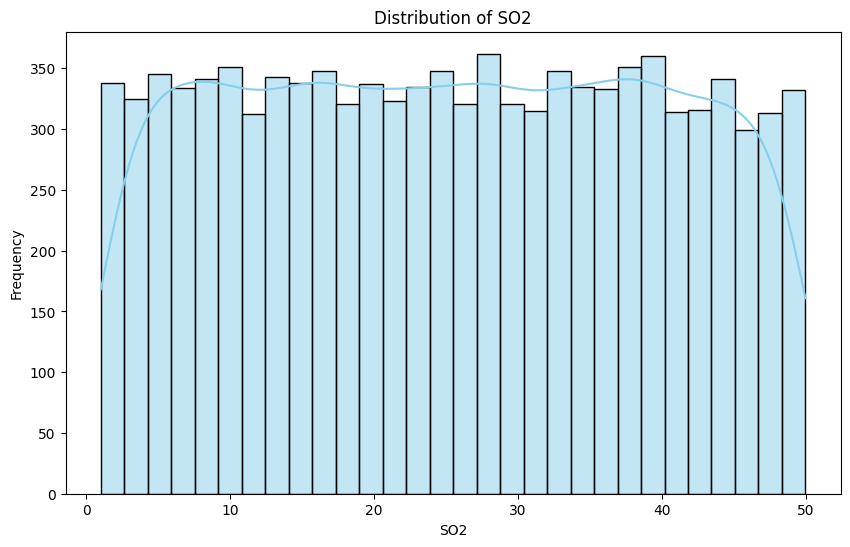

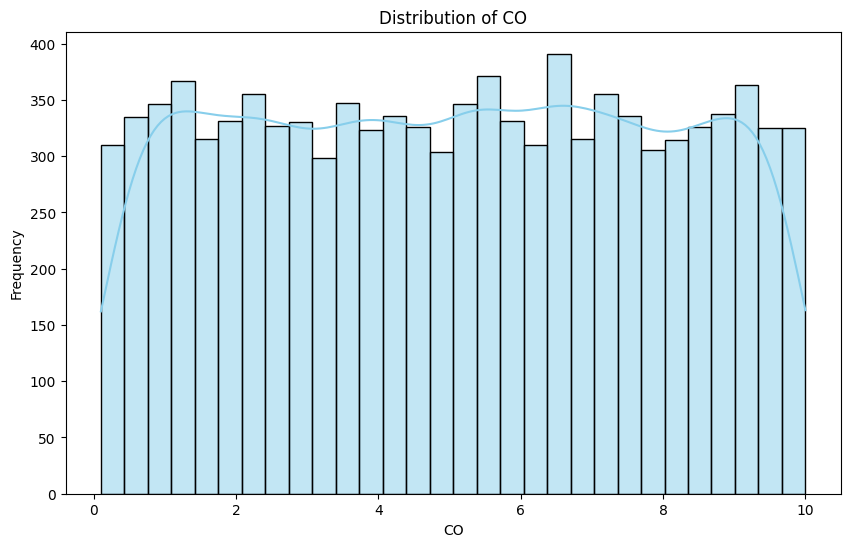

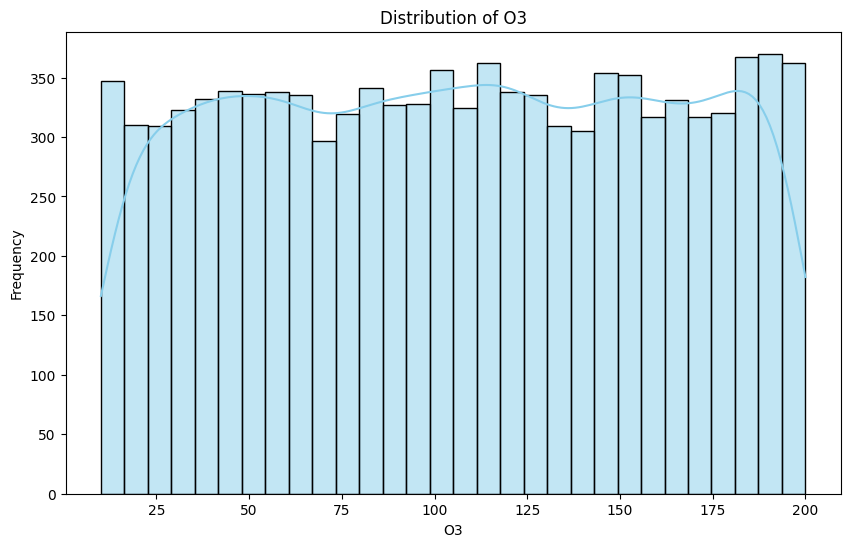


Analysis of Year-over-Year Trends:


,PM2.5,PM10,NO2,SO2,CO,O3
Year,,,,,,
2021,76.617126,104.834479,52.150276,25.761815,5.041047,106.631611
2022,78.266865,104.418461,52.276073,25.258560,5.079580,106.079034
2023,77.461323,104.061656,52.169607,25.013194,5.023332,105.384478



Analysis of Month-over-Month Trends:


PM2.5        PM10        NO2        SO2        CO          O3
Year Month                                                                   
2021 1      75.837352  105.833275  51.754181  25.158920  5.015505  103.541289
     2      79.622248  107.203527  53.866822  25.982907  4.875853  106.584070
     3      81.120340  107.241623  51.315358  25.673208  5.036113  102.837849
     4      75.725000  106.558953  55.086959  26.008378  5.158378  108.004696
     5      72.685745  100.088723  53.663050  24.978440  4.845674  110.684894
     6      75.288862   99.244586  51.029207  26.488483  4.992379  108.497034
     7      77.466667  104.004673  53.659542  25.573660  5.206569  100.418431
     8      78.231444   98.822519  50.119222  24.049407  5.206963  107.066741
     9      72.171397  111.994559  51.505000  26.523493  5.015956  105.373309
     10     76.780732  108.662787  49.626307  26.262544  5.121080  107.602718
     11     76.174235  106.080353  51.248941  26.249608  5.079765  105.937490
     12     78.852717  102.669774  52.669509  26.219623  4.906226  113.568981
2022 1      85.498612  104.506612  50.623347  24.676980  5.034082  103.191878
     2      78.376014  101.497283  54.125254  25.026920  5.120688  107.729493
     3      76.822305  104.774983  51.102610  24.858847  5.329729  108.849051
     4      75.001199  103.968253  50.546507  25.660890  5.200034  103.162089
     5      79.609339  103.649105  52.738132  26.647938  5.134475  106.792996
     6      75.155791   98.816079  51.149964  25.250360  5.276331  102.305612
     7      77.650038  103.767165  54.116935  24.726284  4.901149  107.558238
     8      81.408865  108.750851  54.278298  25.862837  4.992730  107.511950
     9      75.387589  107.085851  51.377021  24.803475  5.001879  109.255177
     10     77.970630   97.790866  52.554961  25.732992  5.078583  105.932362
     11     78.228190  109.731365  53.185810  25.160317  5.064667  105.355746
     12     79.185811  107.026622  51.570304  24.783412  4.809155  105.170946
2023 1      77.844535  101.522268  53.526580  25.221301  4.956320  106.616580
     2      72.110322  105.954084  51.820482  23.731479  5.140932  104.279293
     3      77.826622  103.031993  50.060845  25.559324  4.850000  102.982872
     4      79.525102  106.564456  53.108401  24.946190  5.127925  105.178639
     5      77.469270  104.196861  54.495328  26.295912  5.094416  109.668358
     6      79.285895  102.084947  51.713895  24.600000  4.840982   99.254070
     7      74.815860  106.586421  52.597860  25.040421  5.014070  105.296702
     8      78.006565  109.045687  49.621183  25.318588  4.846794  110.020229
     9      75.694050  104.213548  51.690036  25.709319  5.227563  106.945520
     10     78.313962  105.781208  51.782717  25.952453  5.048151  108.636604
     11     81.515276   97.748307  53.907165  24.761693  5.068386  108.866732
     12     78.124923  101.253885  51.881115  23.089962  5.055615   97.637038

In [8]:
#  Identifying columns representing customer engagement metrics
engagement_metrics = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

#  Creating a gradient histogram for each metric
print("Gradient Histograms for Engagement Metrics:")
for metric in engagement_metrics:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=metric, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()

#  Analyzing YOY and MOM trends
print("\nAnalysis of Year-over-Year Trends:")
display(yoy_analysis[engagement_metrics])

print("\nAnalysis of Month-over-Month Trends:")
display(mom_analysis[engagement_metrics])

### Insights

*   Further investigation into the specific sources of key pollutants in each city is recommended based on the observed city-specific variations.
*   Developing targeted interventions and public awareness campaigns based on the identified seasonal patterns and pollutant distributions could help in maintaining fresh air.
